<h1> Group 20 - DMML Coursework 2 - J48<h1>
    
<hr>

Disclaimer : Whilst we know we are not running J48 (a java equivalent of the C4.5 algorithm), we simply kept this notation inplace of CART for ease of marking. 

<h3 style="color:blue"> Data <h3> 

Goal : Setup full training data set :

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

#read the attribute csvs file into respective dataframes
X = pd.read_csv ('x_train_gr_smpl.csv')


# read the class attribute file into Y datafram
Y = pd.read_csv('y_train_smpl.csv')
Y.columns = ['Class']

#join the two such that Y is the last column
XYraw = pd.concat([X,Y], axis=1)
#check the concatination
print(XYraw)

          0      1      2      3      4      5      6      7      8      9  \
0      78.0   77.0   76.0   82.0   87.0   92.0  104.0  119.0  117.0  120.0   
1      73.0   75.0   79.0   78.0   76.0   75.0   89.0  107.0  133.0  125.0   
2      72.0   75.0   79.0   77.0   81.0   89.0  105.0  109.0   86.0   90.0   
3      67.0   70.0   74.0   80.0   93.0  107.0  110.0   96.0   69.0  100.0   
4      74.0   74.0   73.0   72.0   77.0   87.0  104.0  109.0   84.0   83.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685  247.0  220.0  254.0  213.0  129.0  208.0  254.0  255.0  255.0  255.0   
9686  151.0  118.0  254.0  255.0  255.0  255.0  254.0  254.0  254.0  252.0   
9687  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
9688  255.0  253.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
9689  252.0  189.0  238.0  255.0  255.0  245.0  219.0  212.0  140.0   40.0   

      ...  2295  2296   2297  2298  2299  2300   2301   2302   

In [2]:

#convert numberic to nominal 
XYraw[['Class']] = XYraw[['Class']].replace([0, 1, 2,3,4,5,6,7,8,9], ['zero', 'one', 'two','three', 'four', 'five', 'six', 'seven', 'eight',
                                 'nine'])

XYraw.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,Class
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0,zero
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0,zero
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0,zero
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0,zero
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0,zero


In [3]:

#randomise 
XYraw_ran = XYraw.sample(frac=1).reset_index(drop=True)
print(XYraw_ran)

          0      1      2      3      4      5      6      7      8      9  \
0      40.0   38.0   36.0   36.0   38.0   42.0   51.0   54.0   53.0   51.0   
1     176.0  147.0  116.0  104.0   95.0   88.0   91.0   96.0   97.0   82.0   
2     212.0  250.0  254.0  254.0  255.0  255.0  255.0  255.0  254.0  255.0   
3     255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
4      27.0   29.0   34.0   25.0   22.0   21.0   22.0   23.0   25.0   28.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685   15.0   15.0   16.0   16.0   16.0   16.0   15.0   15.0   15.0   15.0   
9686   27.0   28.0   28.0   26.0   26.0   28.0   28.0   27.0   27.0   27.0   
9687   78.0   76.0   77.0   82.0   85.0   80.0   73.0   69.0   70.0   72.0   
9688   80.0   82.0   83.0   84.0   84.0   85.0   87.0   89.0   92.0   79.0   
9689  118.0  139.0  118.0   95.0   97.0   83.0   76.0   69.0   60.0   77.0   

      ...   2295   2296   2297  2298  2299  2300  2301  2302  2

In [4]:
#generate this as a csv to directly feed into analyses on independent notebooks
#XYraw_ran.to_csv('For_10_Fold_Cross_Validation.csv', index = False)

Split Data into data and expected calsses


In [5]:
#read in data from csv 
training_Data = pd.read_csv("For_10_Fold_Cross_Validation.csv")

#look at shape
training_Data.shape 

#look at data format
training_Data.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,Class
0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,31.0,28.0,25.0,22.0,22.0,25.0,26.0,25.0,25.0,four
1,26.0,27.0,28.0,27.0,27.0,24.0,13.0,12.0,21.0,84.0,...,24.0,52.0,77.0,94.0,96.0,96.0,93.0,91.0,89.0,eight
2,149.0,110.0,68.0,55.0,54.0,55.0,45.0,36.0,31.0,35.0,...,149.0,96.0,52.0,54.0,68.0,87.0,110.0,104.0,92.0,two
3,73.0,80.0,86.0,97.0,113.0,120.0,118.0,84.0,56.0,46.0,...,98.0,99.0,100.0,101.0,99.0,98.0,100.0,106.0,114.0,one
4,62.0,58.0,57.0,57.0,57.0,58.0,58.0,54.0,52.0,50.0,...,30.0,29.0,28.0,26.0,25.0,27.0,28.0,28.0,31.0,three


In [6]:
#define the data to be used as all but the class attribute from the data 
X_Train = training_Data.drop('Class', axis = 1)

#define the expexted value to be the class column of the input data 
y_train = training_Data['Class']

Scale data

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_Train)



<h4> Setup Test Data <h4>

Goal : Import test data from file and set it as  t_test and y_test

In [8]:
testData = pd.read_csv ('Test_Dataset.csv')

X_Test = testData.drop('Class', axis = 1)
y_test = testData['Class']


X_test = sc.fit_transform(X_Test)

<h4> Setup 4000 Split of test data <h4>
    

Goal : Take 4000 instances from the original training file and add them to the test file

In [9]:
#Check length of training data
len(training_Data)

9690

In [10]:
#split data into two divisions
data_split4000, data_split5690= training_Data[:4000], training_Data[4000:]

#test new split 
len(data_split4000)

4000

In [11]:
#merge test and 4000 cases from above 
testData_with4000 =pd.concat([testData, data_split4000])

In [12]:
#size of testData before addition
len(testData)

3090

In [13]:
#check items have been added to testData
len(testData_with4000)

7090

In [14]:
#setup training data
X_Train_4000Split = data_split5690.drop('Class', axis = 1)
y_train_4000Split = data_split5690['Class']


#setup test data
X_Test_4000Split = testData_with4000.drop('Class', axis = 1)
y_test_4000Split = testData_with4000['Class']



sc = StandardScaler()
X_train_4000Split = sc.fit_transform(X_Train_4000Split)
X_test_4000Split = sc.fit_transform(X_Test_4000Split)

In [17]:
#generate this as a csv to directly feed into analyses on independent notebooks
testData_with4000.to_csv('testData_4000Split.csv', index = False)

In [18]:
#generate this as a csv to directly feed into analyses on independent notebooks
data_split5690.to_csv('trainData_5690Split.csv', index = False)

<h4> Setup 9000 Split <h4> 

Goal : Take 9000 instances from the original training file and add them to the test file

In [19]:
#Check length of training data
len(training_Data)

9690

In [20]:
#split data into two divisions
data_split9000, data_split690= training_Data[:9000], training_Data[9000:]

#test new split 
len(data_split9000)

9000

In [21]:
#merge test and 4000 cases from above 
testData_with9000 =pd.concat([testData, data_split9000])

In [22]:
#size of testData before addition 
len(testData)

3090

In [23]:
#check items have been added to testData
len(testData_with9000)

12090

In [30]:
#setup training data
X_Train_9000Split = data_split690.drop('Class', axis = 1)
y_train_9000Split = data_split690['Class']


#setup test data
X_Test_9000Split = testData_with9000.drop('Class', axis = 1)
y_test_9000Split = testData_with9000['Class']

#scale data
X_train_9000Split = sc.fit_transform(X_Train_9000Split)
X_test_9000Split = sc.fit_transform(X_Test_9000Split)

In [31]:
#generate this as a csv to directly feed into analyses on independent notebooks
testData_with9000.to_csv('testData_9000Split.csv', index = False)

In [32]:
#generate this as a csv to directly feed into analyses on independent notebooks
data_split690.to_csv('trainData_690Split.csv', index = False)

In [101]:
len(y_test_9000Split)

12090

In [102]:
len(y_train_9000Split)

690

In [103]:
len(X_train_9000Split)

690

In [104]:
len(X_test_9000Split)

12090

Setup Dataframe for all tree data

In [21]:
treeComparisonTable = pd.DataFrame(columns=["Number of Nodes", "Depth of Tree", "Number of Leaves", "Accuracy" ])

In [22]:
treeComparisonTable

,Number of Nodes,Depth of Tree,Number of Leaves,Accuracy


Setup Tree Comparison DataFrame

Summary : 

X_train - full training data (minus class data) <br>
X_train_4000Split - 4000 removed instances from X_train<br>
X_train_9000Split - 9000 removed instances from X_train <br>

X_test - original test data 
X_test_4000Split - 4000 more instances, taken from X_train<br>
X_test_9000Split - 9000 more instances, taken from X_train<br>

y_train - class attributes for the full training data<br>
y_train_4000Split - 4000 removed instances than y_train<br>
y_train_9000Split - 9000 removed instances than y_train<br>

y_test - class attributes for original testing data <br>
y_test_4000Split - 4000 more instances, taken from y_train <br>
y_test_9000Split - 9000 more instances, taken from y_train <br>

<h2> Decision Trees <h2> 
    <hr>
<h2> J48 - Default Settings<h2>

Decision tree adapted from : 
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
<hr>
Cross-Validation adapted from : 
https://scikit-learn.org/stable/modules/cross_validation.html 
    
HOWEVER Sklearn uses CART rather than C4.5 which is the algorithm that J48 runs off so this could be incorrect. 

In [33]:
#imports for J48
from sklearn.tree import DecisionTreeClassifier

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.tree import export_graphviz, plot_tree

import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict



<h4> Cross validation <h4>

Goal : Run cross a decision tree classifier with 10 fold cross validation then output metrics

In [34]:
# adapted from https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
#
# Sklearn uses CART rather than C4.5 which is the algorithm that J48 runs off so this could be incorrect. Both 

J48_crossVal = DecisionTreeClassifier()
J48_crossVal.fit(X_train, y_train)

#setup cross validation using the above classifier, X_train = data to be classified, y = the labels, CV = number of folds
cross_validation_scores_J48 = cross_val_score(J48_crossVal, X_train, y_train, cv=10)

Text(0.5, 1.0, 'Average score: 0.8311661506707946')

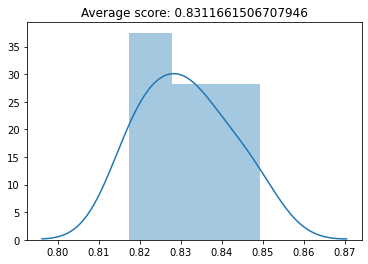

In [35]:
# use seaborn (sns) to plot a graph of the above scores
sns.distplot(cross_validation_scores_J48)
plt.title('Average score: {}'.format(np.mean(cross_validation_scores_J48)))

In [36]:
#train model with 10 fold validation, 
#cross_val_predict Get predictions from each split of cross-validation for diagnostic purposes.
y_pred_J48_crossVal = cross_val_predict(J48_crossVal, X_train, y_train, cv=10)

#confusion matrix generation
conf_matrix_J48_crossVal = confusion_matrix(y_train, y_pred_J48_crossVal)

#accuracy report
classification_report_J48_crossVal = classification_report(y_train, y_pred_J48_crossVal)

#Tree topology metrics
n_nodes_J48_crossVal = J48_crossVal.tree_.node_count
depth_J48_crossVal = J48_crossVal.get_depth()
num_Leaves_J48_crossVal = J48_crossVal.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_crossVal = accuracy_score(y_train, y_pred_J48_crossVal)*100

J48_crossVal_data = [n_nodes_J48_crossVal, depth_J48_crossVal, num_Leaves_J48_crossVal, accuracy_J48_crossVal]


In [37]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_crossVal)

print("\n")
print(classification_report_J48_crossVal)
#print(roc_auc_score(y, y_pred))
print("\n")


print("Number of Nodes : " + str(n_nodes_J48_crossVal))
print("Depth of Tree : " + str(depth_J48_crossVal))
print("Number of Leaves : " + str(num_Leaves_J48_crossVal))
print("Accuracy of Model : " + str(accuracy_J48_crossVal))

Confusion Matrix
[[ 439    4    7   11   17    9   15   11   22    5]
 [   2  149    7    9    5   11    3   10   12    2]
 [   4    3 1761    4   78    8    4   27   82    9]
 [  16    6    5  191   12    5    7   14   12    2]
 [  16    7   96    8 1848    6   10   47  169   13]
 [   9    6    4    5    7  179   10    6   10    4]
 [  10    7   10    6   13    3  286   13   10    2]
 [  11    7   24   11   43    6    7 1211   81    9]
 [  15    6   89   16  146   14   14   90 1847   13]
 [   3    1   19    2   24    2    1    6   10  142]]


              precision    recall  f1-score   support

       eight       0.84      0.81      0.82       540
        five       0.76      0.71      0.73       210
        four       0.87      0.89      0.88      1980
        nine       0.73      0.71      0.72       270
         one       0.84      0.83      0.84      2220
       seven       0.74      0.75      0.74       240
         six       0.80      0.79      0.80       360
       three     

<hr>
<h4>Part 2 - Using test data<h4>

Goal : Run decision classifier on test data provided

In [38]:
#define the model to be used 
J48_withTestData = DecisionTreeClassifier()

#fit this model using the test data
J48_withTestData.fit(X_train, y_train)

#test this model on the seperated data
y_pred_J48_withTestData = J48_withTestData.predict(X_test)


#confusion matrix generation
conf_matrix_J48_withTestData = confusion_matrix(y_test, y_pred_J48_withTestData)

#accuracy report
classification_report_J48_withTestData = classification_report(y_test, y_pred_J48_withTestData)

#Tree topology metrics
n_nodes_J48_withTestData = J48_withTestData.tree_.node_count
depth_J48_withTestData = J48_withTestData.get_depth()
num_Leaves_J48_withTestData = J48_withTestData.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_withTestData = accuracy_score(y_test, y_pred_J48_withTestData)*100

J48_withTestData_data = [n_nodes_J48_withTestData, depth_J48_withTestData, num_Leaves_J48_withTestData, accuracy_J48_withTestData]

In [39]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_withTestData)
print("\n")
print(classification_report_J48_withTestData)

print("Number of Nodes : " + str(n_nodes_J48_withTestData))
print("Depth of Tree : " + str(depth_J48_withTestData))
print("Number of Leaves : " + str(num_Leaves_J48_withTestData))
print("Accuracy of Model : " + str(accuracy_J48_withTestData))

Confusion Matrix
[[ 66   7   6   7  11   9  13  15  11   5]
 [  0  27   0   0   0   2   1  30   0   0]
 [  6   2 441   6  57  18   8  41  54  27]
 [ 12   1   1  38   1   6   1   2  28   0]
 [  4   2  57   2 547   2   0  11  69  26]
 [  0  10   2   4  24  13   3   4   0   0]
 [ 13  11   3   3  13   1  36   6   4   0]
 [  2   0  26   6  44   1   8 310  51   2]
 [  3   3  69   5  66  14   8  47 530   5]
 [  0   0  18   2   7   1   4   0   4  24]]


              precision    recall  f1-score   support

       eight       0.62      0.44      0.52       150
        five       0.43      0.45      0.44        60
        four       0.71      0.67      0.69       660
        nine       0.52      0.42      0.47        90
         one       0.71      0.76      0.73       720
       seven       0.19      0.22      0.20        60
         six       0.44      0.40      0.42        90
       three       0.67      0.69      0.68       450
         two       0.71      0.71      0.71       750
        z

<hr>
<h4>Part 3 - 4000 into the test cases <h4>

Goal : Run decision tree classifier on a reduced training set, but increased training set.

In [40]:
#define the model to be used 
J48_4000Split = DecisionTreeClassifier()

#fit this model using the test data
J48_4000Split.fit(X_train_4000Split, y_train_4000Split)

#test this model on the seperated data
y_pred_J48_4000Split = J48_4000Split.predict(X_test_4000Split)

#generate confusion matrix
conf_matrix_J48_4000Split = confusion_matrix(y_test_4000Split, y_pred_J48_4000Split)

#generate classification report
classification_report_J48_4000Split = classification_report(y_test_4000Split, y_pred_J48_4000Split)

#Tree topology metrics
n_nodes_J48_4000Split = J48_4000Split.tree_.node_count
depth_J48_4000Split = J48_4000Split.get_depth()
num_Leaves_J48_4000Split = J48_4000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_4000Split = accuracy_score(y_test_4000Split, y_pred_J48_4000Split)*100

J48_4000Split_data = [n_nodes_J48_4000Split, depth_J48_4000Split, num_Leaves_J48_4000Split, accuracy_J48_4000Split]

In [41]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_4000Split)
print("\n")
print(classification_report_J48_4000Split)

print("Number of Nodes : " + str(n_nodes_J48_4000Split))
print("Depth of Tree : " + str(depth_J48_4000Split))
print("Number of Leaves : " + str(num_Leaves_J48_4000Split))
print("Accuracy of Model : " + str(accuracy_J48_4000Split))

Confusion Matrix
[[ 222   11   14   13   24   13   15   24   20    7]
 [   1   79   14    5    4    2    2   29    3    0]
 [   8    1 1133    3  123    7   19   36   91   25]
 [  22    5    5  117   10    7    5   11   28    2]
 [  20    4  117    5 1280   10    5   36  149   22]
 [   5    4   10    5   23   92    6   11    7    2]
 [  31   11    6    4   10    3  147   15    9    5]
 [  20    3   20   16   69    1   15  784  125   12]
 [  15    8   93    2  184    2   11   87 1257    4]
 [   2    0   17    2   44    0    3    5    8   67]]


              precision    recall  f1-score   support

       eight       0.64      0.61      0.63       363
        five       0.63      0.57      0.60       139
        four       0.79      0.78      0.79      1446
        nine       0.68      0.55      0.61       212
         one       0.72      0.78      0.75      1648
       seven       0.67      0.56      0.61       165
         six       0.64      0.61      0.63       241
       three     

<hr>
<h4>Part 4 - 9000 into the test cases <h4>

Goal : Run decision tree classifier on a reduced training set, but increased training set

In [42]:
#define the model to be used 
J48_9000Split = DecisionTreeClassifier()

#fit this model using the test data
J48_9000Split.fit(X_train_9000Split, y_train_9000Split)

#test this model on the seperated data
y_pred_J48_9000Split = J48_9000Split.predict(X_test_9000Split)

#generate confusion matrix
conf_matrix_J48_9000Split = confusion_matrix(y_test_9000Split, y_pred_J48_9000Split)

#generate classification report
classification_report_J48_9000Split = classification_report(y_test_9000Split, y_pred_J48_9000Split)

#Tree topology metrics
n_nodes_J48_9000Split = J48_9000Split.tree_.node_count
depth_J48_9000Split = J48_9000Split.get_depth()
num_Leaves_J48_9000Split = J48_9000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_9000Split = accuracy_score(y_test_9000Split, y_pred_J48_9000Split)*100

J48_9000Split_data = [n_nodes_J48_9000Split, depth_J48_9000Split, num_Leaves_J48_9000Split, accuracy_J48_9000Split]

In [43]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_9000Split)
print("\n")
print(classification_report_J48_9000Split)

print("Number of Nodes : " + str(n_nodes_J48_9000Split))
print("Depth of Tree : " + str(depth_J48_9000Split))
print("Number of Leaves : " + str(num_Leaves_J48_9000Split))
print("Accuracy of Model : " + str(accuracy_J48_9000Split))

Confusion Matrix
[[ 346   56   40   30   40   20   27   34   32   21]
 [  27  100   36   23    2   26    7   24    7    0]
 [  64   29 1577   31  344   50   36   52  272   31]
 [  64   14   13  129   10   12   44   22   16   10]
 [  70   25  235   38 1654   64   28   88  468  117]
 [  19    7   37   19   25   98    6    5   64    7]
 [  81    3   17   10   19   11  157   78   46    2]
 [  67   19   90   33  148    6   85 1051  256   13]
 [ 104   21  230   35  443   58   34  241 1633   53]
 [  21    0   35    5   66    2    0   10   52   63]]


              precision    recall  f1-score   support

       eight       0.40      0.54      0.46       646
        five       0.36      0.40      0.38       252
        four       0.68      0.63      0.66      2486
        nine       0.37      0.39      0.38       334
         one       0.60      0.59      0.60      2787
       seven       0.28      0.34      0.31       287
         six       0.37      0.37      0.37       424
       three     

<h4> Generate Table to Explore Results <h4>

In [44]:
infoFrames = [J48_crossVal_data, J48_withTestData_data, J48_4000Split_data, J48_9000Split_data]

J48_Table = pd.DataFrame(infoFrames, columns=["Number of Nodes", "Depth of Tree", "Number of Leaves", "Accuracy" ], index=['Cross Validation','Test Data','4000 Split','9000 Split'])

J48_Table

,Number of Nodes,Depth of Tree,Number of Leaves,Accuracy
Cross Validation,1483,24,742,83.106295
Test Data,1485,24,743,65.760518
4000 Split,1153,21,577,73.032440
9000 Split,231,14,116,56.311001


<h3> J48 Parameter Exploration <h3>

<hr>


    
Goal : To understand how binary splits or multiple branching, pruning,
confidence threshold for pruning, and the minimal number of instances permissible per leaf.

<h4> binary splits or multiple branching <h4> 

Editing this with the DecisionTreeClassifier is not possible, thus we must hypothesize on its effects.

<h4>Pruning <h4>

 Information on pruning a decision tree classifier, if it doesnt work open a tab in incognito mode and it will show you the full article. 
 https://medium.com/swlh/post-pruning-decision-trees-using-python-b5d4bcda8e23
 
 the below implementation is heavily influenced by the above link.

In [45]:
#cost_complexity_pruning_path - implements the pruning process and returns the effective 
# alphas and respective impurities of the prund tree

classifier_J48_TD_Pruned=DecisionTreeClassifier(random_state=1).\
cost_complexity_pruning_path(X_train, y_train)

#ccp_alpha is used as a parameter for post pruning - ie pruning the tree after it has 'grown'
ccp_alphas, impurities = classifier_J48_TD_Pruned.ccp_alphas, classifier_J48_TD_Pruned.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

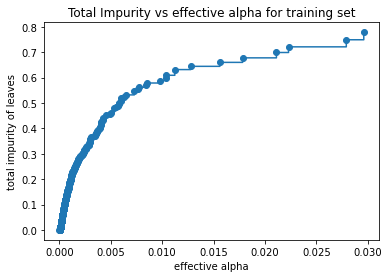

In [46]:
#Plotting the alphas vs impurities(except the last alpha corresponding to root node):

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [47]:

#the below codeis disabled as it takes over 4 hours to run, running DecisionTreeClassifer over 661 instances.
# In short, it runs decision tree classifeirs over trees pruned with increasing alphas, then saves these results to a 
# list and graphs the resulting accuracies. This allows for observation of the best ccp_alpha value to use for 
# this model. 
'''
#build a forest of trees with different values of ccp_alpha values extracted from 
# cost_complexity_pruning_path in order. The last tree will be the root node.

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1,ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

print("Number of nodes in the last tree is: {} with ccp_alpha: {} and a depth of: {}".format(
clfs[-1].tree_.node_count, ccp_alphas[-1],clfs[-1].tree_.max_depth))

#Remove the last tree in the list as it is a single noded tree with a depth of 0, thus we can remove. 

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# plot how different values of ccp_alpha effects the number of nodes and depth of the corresponding pruned trees

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#plot the accuracy vs alpha for training and test 

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()


index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

#turn the above dictionary into a dataframe then save it to a file 
#alphaData = pd.DataFrame(clfs)
#alphaData.to_csv('alphaData.csv')
'''

'\n#build a forest of trees with different values of ccp_alpha values extracted from \n# cost_complexity_pruning_path in order. The last tree will be the root node.\n\nclfs = []\nfor ccp_alpha in ccp_alphas:\n    clf = DecisionTreeClassifier(random_state=1,ccp_alpha=ccp_alpha)\n    clf.fit(X_train, y_train)\n    clfs.append(clf)\n\nprint("Number of nodes in the last tree is: {} with ccp_alpha: {} and a depth of: {}".format(\nclfs[-1].tree_.node_count, ccp_alphas[-1],clfs[-1].tree_.max_depth))\n\n#Remove the last tree in the list as it is a single noded tree with a depth of 0, thus we can remove. \n\nclfs = clfs[:-1]\nccp_alphas = ccp_alphas[:-1]\n\n# plot how different values of ccp_alpha effects the number of nodes and depth of the corresponding pruned trees\n\nnode_counts = [clf.tree_.node_count for clf in clfs]\ndepth = [clf.tree_.max_depth for clf in clfs]\nfig, ax = plt.subplots(2, 1)\nax[0].plot(ccp_alphas, node_counts, marker=\'o\', drawstyle="steps-post")\nax[0].set_xlabel("alp

Conclusions from above : approx 0.001 is the most effective value of cc_alpha on the test set. Pruning only reduces the accuracy of the model ran on its training data. 

part 1 - Cross-Validation

In [48]:
J48_pruned_crossVal = DecisionTreeClassifier(ccp_alpha= 0.001)
J48_pruned_crossVal.fit(X_train, y_train)

#setup cross validation using the above classifier, X_train = data to be classified, y = the labels, CV = number of folds
cross_validation_scores_J48_pruned = cross_val_score(J48_pruned_crossVal, X_train, y_train, cv=10)

#train model with 10 fold validation, 
#cross_val_predict Get predictions from each split of cross-validation for diagnostic purposes.
y_pred_J48_pruned_crossVal = cross_val_predict(J48_pruned_crossVal, X_train, y_train, cv=10)

#confusion matrix generation
conf_matrix_J48_pruned_crossVal = confusion_matrix(y_train, y_pred_J48_pruned_crossVal)

#accuracy report
classification_report_J48_pruned_crossVal = classification_report(y_train, y_pred_J48_pruned_crossVal)

#Tree topology metrics
n_nodes_J48_pruned_crossVal = J48_pruned_crossVal.tree_.node_count
depth_J48_pruned_crossVal = J48_pruned_crossVal.get_depth()
num_Leaves_J48_pruned_crossVal = J48_pruned_crossVal.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_pruned_crossVal = accuracy_score(y_train, y_pred_J48_pruned_crossVal)*100

J48_pruned_crossVal_data = [n_nodes_J48_pruned_crossVal, depth_J48_pruned_crossVal, num_Leaves_J48_pruned_crossVal, accuracy_J48_pruned_crossVal]


In [49]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_pruned_crossVal)
print("\n")
print(classification_report_J48_pruned_crossVal)

print("Number of Nodes : " + str(n_nodes_J48_pruned_crossVal))
print("Depth of Tree : " + str(depth_J48_pruned_crossVal))
print("Number of Leaves : " + str(num_Leaves_J48_pruned_crossVal))
print("Accuracy of Model : " + str(accuracy_J48_pruned_crossVal))

Confusion Matrix
[[ 412    3   12   11   29    8   14   20   24    7]
 [   7  124    7   12   10    9    7    9   24    1]
 [   8   19 1721    2   95    2    3   26   93   11]
 [  15    5    3  182    8    2    9   18   25    3]
 [   8   13  108    8 1828    5    5   52  178   15]
 [   7   11    5    3   22  147   15   14   14    2]
 [  19    6   10    7   14    5  259   23   16    1]
 [  16    6   29   22   48    5   11 1170   97    6]
 [  13   11   99   20  168   10   12   91 1823    3]
 [   3    0   27    2   32    0    0    7   15  124]]


              precision    recall  f1-score   support

       eight       0.81      0.76      0.79       540
        five       0.63      0.59      0.61       210
        four       0.85      0.87      0.86      1980
        nine       0.68      0.67      0.68       270
         one       0.81      0.82      0.82      2220
       seven       0.76      0.61      0.68       240
         six       0.77      0.72      0.75       360
       three     

Part 2 - With test Data

In [50]:
#define the model to be used 
J48_pruned_testData = DecisionTreeClassifier(ccp_alpha= 0.001)

#fit this model using the test data
J48_pruned_testData.fit(X_train, y_train)

#test this model on the seperated data
y_pred_J48_pruned_testData = J48_pruned_testData.predict(X_test)

#generate confusion matrix
conf_matrix_J48_pruned_testData = confusion_matrix(y_test, y_pred_J48_pruned_testData)

#generate classification report
classification_report_J48_pruned_testData = classification_report(y_test, y_pred_J48_pruned_testData)

#Tree topology metrics
n_nodes_J48_pruned_testData = J48_pruned_testData.tree_.node_count
depth_J48_pruned_testData = J48_pruned_testData.get_depth()
num_Leaves_J48_pruned_testData = J48_pruned_testData.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_pruned_testData = accuracy_score(y_test, y_pred_J48_pruned_testData)*100

J48_pruned_testData_data = [n_nodes_J48_pruned_testData, depth_J48_pruned_testData, num_Leaves_J48_pruned_testData, accuracy_J48_pruned_testData]


In [52]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_pruned_testData)
print("\n")
print(classification_report_J48_pruned_testData)

print("Number of Nodes : " + str(n_nodes_J48_pruned_testData))
print("Depth of Tree : " + str(depth_J48_pruned_testData))
print("Number of Leaves : " + str(num_Leaves_J48_pruned_testData))
print("Accuracy of Model : " + str(accuracy_J48_pruned_testData))

Confusion Matrix
[[ 57   8  17   7  11   8   7  19  14   2]
 [  0  28   0   0   0   2   0  30   0   0]
 [  2   3 484   1  41  10   7  52  48  12]
 [  2  14   0  45  19   0   1   0   9   0]
 [  4   0  66   2 550   4   3  14  74   3]
 [  0  10   2   3  34   4   0   4   0   3]
 [ 22  14   2   4  10   1  23   4   5   5]
 [  6   4  15   8  29  14   5 294  73   2]
 [  7   1  67   9  74   5   0  42 543   2]
 [  0   0  25   0  18   0   0   0   1  16]]


              precision    recall  f1-score   support

       eight       0.57      0.38      0.46       150
        five       0.34      0.47      0.39        60
        four       0.71      0.73      0.72       660
        nine       0.57      0.50      0.53        90
         one       0.70      0.76      0.73       720
       seven       0.08      0.07      0.07        60
         six       0.50      0.26      0.34        90
       three       0.64      0.65      0.65       450
         two       0.71      0.72      0.72       750
        z

part 3 - 4000 Split 

In [53]:
#define the model to be used 
J48_pruned_4000Split = DecisionTreeClassifier(ccp_alpha= 0.001)

#fit this model using the test data
J48_pruned_4000Split.fit(X_train_4000Split, y_train_4000Split)

#test this model on the seperated data
y_pred_J48_pruned_4000Split = J48_pruned_4000Split.predict(X_test_4000Split)

#generate confusion matrix
conf_matrix_J48_pruned_4000Split = confusion_matrix(y_test_4000Split, y_pred_J48_pruned_4000Split)

#generate classification report
classification_report_J48_pruned_4000Split = classification_report(y_test_4000Split, y_pred_J48_pruned_4000Split)

#Tree topology metrics
n_nodes_J48_pruned_4000Split = J48_pruned_4000Split.tree_.node_count
depth_J48_pruned_4000Split = J48_pruned_4000Split.get_depth()
num_Leaves_J48_pruned_4000Split = J48_pruned_4000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_pruned_4000Split = accuracy_score(y_test_4000Split, y_pred_J48_pruned_4000Split)*100

J48_pruned_4000Split_data = [n_nodes_J48_pruned_4000Split, depth_J48_pruned_4000Split, num_Leaves_J48_pruned_4000Split, accuracy_J48_pruned_4000Split]


In [54]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_pruned_4000Split)
print("\n")
print(classification_report_J48_pruned_4000Split)

print("Number of Nodes : " + str(n_nodes_J48_pruned_4000Split))
print("Depth of Tree : " + str(depth_J48_pruned_4000Split))
print("Number of Leaves : " + str(num_Leaves_J48_pruned_4000Split))
print("Accuracy of Model : " + str(accuracy_J48_pruned_4000Split))

Confusion Matrix
[[ 226   26   13   14   12   15    8   16   30    3]
 [   8   69   15    2    2    4    1   32    6    0]
 [  11    6 1144    6  127   11    6   37   70   28]
 [  21    3    3  113   18    4    5   10   32    3]
 [  18    5  117    5 1317    6    1   22  145   12]
 [  12    3    6    7   42   70   11    4    9    1]
 [  30   11   12    1   15    3  132   19   14    4]
 [  19    9   33   13   79    1    4  755  147    5]
 [  19    7   93    7  162    2    5   93 1270    5]
 [   5    0   28    3   39    0    0    8    1   64]]


              precision    recall  f1-score   support

       eight       0.61      0.62      0.62       363
        five       0.50      0.50      0.50       139
        four       0.78      0.79      0.79      1446
        nine       0.66      0.53      0.59       212
         one       0.73      0.80      0.76      1648
       seven       0.60      0.42      0.50       165
         six       0.76      0.55      0.64       241
       three     

part 4 - 9000 Split

In [55]:
#define the model to be used 
J48_pruned_9000Split = DecisionTreeClassifier(ccp_alpha= 0.001)

#fit this model using the test data
J48_pruned_9000Split.fit(X_train_9000Split, y_train_9000Split)

#test this model on the seperated data
y_pred_J48_pruned_9000Split = J48_pruned_9000Split.predict(X_test_9000Split)

#generate confusion matrix
conf_matrix_J48_pruned_9000Split = confusion_matrix(y_test_9000Split, y_pred_J48_pruned_9000Split)

#generate classification report
classification_report_J48_pruned_9000Split = classification_report(y_test_9000Split, y_pred_J48_pruned_9000Split)

#Tree topology metrics
n_nodes_J48_pruned_9000Split = J48_pruned_9000Split.tree_.node_count
depth_J48_pruned_9000Split = J48_pruned_9000Split.get_depth()
num_Leaves_J48_pruned_9000Split = J48_pruned_9000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_pruned_9000Split = accuracy_score(y_test_9000Split, y_pred_J48_pruned_9000Split)*100

J48_pruned_9000Split_data = [n_nodes_J48_pruned_9000Split, depth_J48_pruned_9000Split, num_Leaves_J48_pruned_9000Split, accuracy_J48_pruned_9000Split]


In [56]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_pruned_9000Split)
print("\n")
print(classification_report_J48_pruned_9000Split)

print("Number of Nodes : " + str(n_nodes_J48_pruned_9000Split))
print("Depth of Tree : " + str(depth_J48_pruned_9000Split))
print("Number of Leaves : " + str(num_Leaves_J48_pruned_9000Split))
print("Accuracy of Model : " + str(accuracy_J48_pruned_9000Split))

Confusion Matrix
[[ 311   36   58   48   38   19   46   41   29   20]
 [  26  119   22   29    7    6   12   23    8    0]
 [  30   65 1581   23  319   19   80   49  279   41]
 [  39    5    8  154   15    9   50   24    9   21]
 [  87   32  246   40 1627   17   34   75  484  145]
 [  42    7   29   35   26   74    4    7   60    3]
 [  91    3   18   10   19   13  167   78   23    2]
 [  58   18   81   43  171   11  117 1027  234    8]
 [ 119    6  263   65  440   32   54  221 1589   63]
 [  20    2   40    7   78    1    0   11   22   73]]


              precision    recall  f1-score   support

       eight       0.38      0.48      0.42       646
        five       0.41      0.47      0.44       252
        four       0.67      0.64      0.65      2486
        nine       0.34      0.46      0.39       334
         one       0.59      0.58      0.59      2787
       seven       0.37      0.26      0.30       287
         six       0.30      0.39      0.34       424
       three     

summary table creation

In [57]:
infoFrames2 = [J48_pruned_crossVal_data, J48_pruned_testData_data, J48_pruned_4000Split_data, J48_pruned_9000Split_data]

J48_Table_pruned = pd.DataFrame(infoFrames2, columns=["Number of Nodes", "Depth of Tree", "Number of Leaves", "Accuracy" ], index=['Cross Validation','Test Data','4000 Split','9000 Split'])

J48_Table_pruned

,Number of Nodes,Depth of Tree,Number of Leaves,Accuracy
Cross Validation,313,14,157,80.392157
Test Data,313,14,157,66.148867
4000 Split,323,14,162,72.778561
9000 Split,231,14,116,55.599669


<h4> Gini vs Entropy <h4>

Decision tree classifier allows for use of two strategies for attribute selectioon, entropy and gini. 
“gini” = Gini index
“entropy” = information gain.

part 1  - crossValidation

In [58]:
J48_entropy_crossVal = DecisionTreeClassifier(criterion="entropy")
J48_entropy_crossVal.fit(X_train, y_train)

#setup cross validation using the above classifier, X_train = data to be classified, y = the labels, CV = number of folds
cross_validation_scores_J48_entropy = cross_val_score(J48_entropy_crossVal, X_train, y_train, cv=10)

#train model with 10 fold validation, 
#cross_val_predict Get predictions from each split of cross-validation for diagnostic purposes.
y_pred_J48_entropy_crossVal = cross_val_predict(J48_entropy_crossVal, X_train, y_train, cv=10)

#confusion matrix generation
conf_matrix_J48_entropy_crossVal = confusion_matrix(y_train, y_pred_J48_entropy_crossVal)

#accuracy report
classification_report_J48_entropy_crossVal = classification_report(y_train, y_pred_J48_entropy_crossVal)

#Tree topology metrics
n_nodes_J48_entropy_crossVal = J48_entropy_crossVal.tree_.node_count
depth_J48_entropy_crossVal = J48_entropy_crossVal.get_depth()
num_Leaves_J48_entropy_crossVal = J48_entropy_crossVal.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_entropy_crossVal = accuracy_score(y_train, y_pred_J48_entropy_crossVal)*100

J48_entropy_crossVal_data = [n_nodes_J48_entropy_crossVal, depth_J48_entropy_crossVal, num_Leaves_J48_entropy_crossVal, accuracy_J48_entropy_crossVal]


In [59]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_entropy_crossVal)

print("\n")
print(classification_report_J48_entropy_crossVal)
#print(roc_auc_score(y, y_pred))
print("\n")


print("Number of Nodes : " + str(n_nodes_J48_entropy_crossVal))
print("Depth of Tree : " + str(depth_J48_entropy_crossVal))
print("Number of Leaves : " + str(num_Leaves_J48_entropy_crossVal))
print("Accuracy of Model : " + str(accuracy_J48_entropy_crossVal))

Confusion Matrix
[[ 460    9    4   14   12    6   16    9    9    1]
 [   8  163    3    5    2    8    2    4   15    0]
 [   1    5 1764    7   91    6    4   26   63   13]
 [  16    6    6  197    7    4    7   12   13    2]
 [  12    0   74    7 1915    5   11   27  148   21]
 [  10    6    4    1    3  198    5    6    6    1]
 [  16    4    9   10    4    7  287   17    6    0]
 [   9    5   24   14   41    3   20 1225   65    4]
 [  13    9   86    6  142   11   10   67 1898    8]
 [   2    0   19    4   23    0    6   10    7  139]]


              precision    recall  f1-score   support

       eight       0.84      0.85      0.85       540
        five       0.79      0.78      0.78       210
        four       0.89      0.89      0.89      1980
        nine       0.74      0.73      0.74       270
         one       0.85      0.86      0.86      2220
       seven       0.80      0.82      0.81       240
         six       0.78      0.80      0.79       360
       three     

part 2 - Test Data 

In [60]:
#Define model, with the splitting criterion set to entropy. Default is Gini 
J48_entropy_testData = DecisionTreeClassifier(criterion="entropy")

#fit this model using the test data
J48_entropy_testData.fit(X_train, y_train)

#test this model on the seperated data
y_pred_J48_entropy_testData = J48_entropy_testData.predict(X_test)

#generate confusion matrix
conf_matrix_J48_entropy_testData = confusion_matrix(y_test, y_pred_J48_entropy_testData)

#generate classification report
classification_report_J48_entropy_testData = classification_report(y_test, y_pred_J48_entropy_testData)

#Tree topology metrics
n_nodes_J48_entropy_testData = J48_entropy_testData.tree_.node_count
depth_J48_entropy_testData = J48_entropy_testData.get_depth()
num_Leaves_J48_entropy_testData = J48_entropy_testData.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_entropy_testData = accuracy_score(y_test, y_pred_J48_entropy_testData)*100

J48_entropy_testData_data = [n_nodes_J48_entropy_testData, depth_J48_entropy_testData, num_Leaves_J48_entropy_testData, accuracy_J48_entropy_testData]

In [61]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_entropy_testData)
print("\n")
print(classification_report_J48_entropy_testData)

print("Number of Nodes : " + str(n_nodes_J48_entropy_testData))
print("Depth of Tree : " + str(depth_J48_entropy_testData))
print("Number of Leaves : " + str(num_Leaves_J48_entropy_testData))
print("Accuracy of Model : " + str(accuracy_J48_entropy_testData))

Confusion Matrix
[[ 95   4   2  16   4   6   1  13   9   0]
 [  1  26  10   0   2   1   2  18   0   0]
 [  1   3 463   7  64   8   4  40  54  16]
 [ 10   1   3  39  17   2   0   0  18   0]
 [  9   2  57   0 554   6   1   9  69  13]
 [  0   0   3   2   7  15   3  14   2  14]
 [ 27  10   5   5   5   2  31   2   1   2]
 [  9   1  10   6  21   0   6 347  47   3]
 [ 12   3  43   1  79   7   0  31 573   1]
 [  0   0   7   3  15   3   2   1   3  26]]


              precision    recall  f1-score   support

       eight       0.58      0.63      0.61       150
        five       0.52      0.43      0.47        60
        four       0.77      0.70      0.73       660
        nine       0.49      0.43      0.46        90
         one       0.72      0.77      0.74       720
       seven       0.30      0.25      0.27        60
         six       0.62      0.34      0.44        90
       three       0.73      0.77      0.75       450
         two       0.74      0.76      0.75       750
        z

part 3 - 4000 Split 

In [62]:
#define the model to be used 
J48_entropy_4000Split = DecisionTreeClassifier(criterion="entropy")

#fit this model using the test data
J48_entropy_4000Split.fit(X_train_4000Split, y_train_4000Split)

#test this model on the seperated data
y_pred_J48_entropy_4000Split = J48_entropy_4000Split.predict(X_test_4000Split)

#generate confusion matrix
conf_matrix_J48_entropy_4000Split = confusion_matrix(y_test_4000Split, y_pred_J48_entropy_4000Split)

#generate classification report
classification_report_J48_entropy_4000Split = classification_report(y_test_4000Split, y_pred_J48_entropy_4000Split)

#Tree topology metrics
n_nodes_J48_entropy_4000Split = J48_entropy_4000Split.tree_.node_count
depth_J48_entropy_4000Split = J48_entropy_4000Split.get_depth()
num_Leaves_J48_entropy_4000Split = J48_entropy_4000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_entropy_4000Split = accuracy_score(y_test_4000Split, y_pred_J48_entropy_4000Split)*100

J48_entropy_4000Split_data = [n_nodes_J48_entropy_4000Split, depth_J48_entropy_4000Split, num_Leaves_J48_entropy_4000Split, accuracy_J48_entropy_4000Split]


In [63]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_entropy_4000Split)
print("\n")
print(classification_report_J48_entropy_4000Split)

print("Number of Nodes : " + str(n_nodes_J48_entropy_4000Split))
print("Depth of Tree : " + str(depth_J48_entropy_4000Split))
print("Number of Leaves : " + str(num_Leaves_J48_entropy_4000Split))
print("Accuracy of Model : " + str(accuracy_J48_entropy_4000Split))

Confusion Matrix
[[ 261    6    5   19   19    9   13   20   10    1]
 [   2   80    3    2   14    2    2   29    5    0]
 [   7   11 1134    2   90   12    7   53  114   16]
 [  20    4    9  128    9    7    5   10   12    8]
 [   3    6  100    1 1334   10    5   27  130   32]
 [   3    2   10   11   10   85    5    7   17   15]
 [  31    5    5   16    1    5  151   11   11    5]
 [  15    2   31   12   63    8   15  789  125    5]
 [  12    6  104    5  116   10   10   45 1350    5]
 [   0    0   34    4   24    0    0    1    4   81]]


              precision    recall  f1-score   support

       eight       0.74      0.72      0.73       363
        five       0.66      0.58      0.61       139
        four       0.79      0.78      0.79      1446
        nine       0.64      0.60      0.62       212
         one       0.79      0.81      0.80      1648
       seven       0.57      0.52      0.54       165
         six       0.71      0.63      0.67       241
       three     

part 4 - 9000 Split

In [64]:
#define the model to be used 
J48_entropy_9000Split = DecisionTreeClassifier(criterion="entropy")

#fit this model using the test data
J48_entropy_9000Split.fit(X_train_9000Split, y_train_9000Split)

#test this model on the seperated data
y_pred_J48_entropy_9000Split = J48_entropy_9000Split.predict(X_test_9000Split)

#generate confusion matrix
conf_matrix_J48_entropy_9000Split = confusion_matrix(y_test_9000Split, y_pred_J48_entropy_9000Split)

#generate classification report
classification_report_J48_entropy_9000Split = classification_report(y_test_9000Split, y_pred_J48_entropy_9000Split)

#Tree topology metrics
n_nodes_J48_entropy_9000Split = J48_entropy_9000Split.tree_.node_count
depth_J48_entropy_9000Split = J48_entropy_9000Split.get_depth()
num_Leaves_J48_entropy_9000Split = J48_entropy_9000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_entropy_9000Split = accuracy_score(y_test_9000Split, y_pred_J48_entropy_9000Split)*100

J48_entropy_9000Split_data = [n_nodes_J48_entropy_9000Split, depth_J48_entropy_9000Split, num_Leaves_J48_entropy_9000Split, accuracy_J48_entropy_9000Split]


In [65]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_entropy_9000Split)
print("\n")
print(classification_report_J48_entropy_9000Split)

print("Number of Nodes : " + str(n_nodes_J48_entropy_9000Split))
print("Depth of Tree : " + str(depth_J48_entropy_9000Split))
print("Number of Leaves : " + str(num_Leaves_J48_entropy_9000Split))
print("Accuracy of Model : " + str(accuracy_J48_entropy_9000Split))

Confusion Matrix
[[ 330   43   21   20   45   33   43   55   34   22]
 [  25   94   45   22    6   10   24    9   15    2]
 [  16   44 1709   39  371   17   43   62  173   12]
 [  43   51    9  141    4   10   19   28   24    5]
 [  33   26  426   22 1592   25    5  110  497   51]
 [  15   50   34   35   20   85    9    8   22    9]
 [  38   14   14    6   10   13  185   97   47    0]
 [  39   25  183   45  139   11   69  986  250   21]
 [  99   28  242   67  310    9   35  313 1729   20]
 [   2   10   46    9   71    0    4   21   16   75]]


              precision    recall  f1-score   support

       eight       0.52      0.51      0.51       646
        five       0.24      0.37      0.30       252
        four       0.63      0.69      0.66      2486
        nine       0.35      0.42      0.38       334
         one       0.62      0.57      0.59      2787
       seven       0.40      0.30      0.34       287
         six       0.42      0.44      0.43       424
       three     

In [66]:
infoFrames3 = [J48_entropy_crossVal_data, J48_entropy_testData_data, J48_entropy_4000Split_data, J48_entropy_9000Split_data]

J48_Table_Entropy = pd.DataFrame(infoFrames3, columns=["Number of Nodes", "Depth of Tree", "Number of Leaves", "Accuracy" ], index=['Cross Validation','Test Data','4000 Split','9000 Split'])

J48_Table_Entropy

,Number of Nodes,Depth of Tree,Number of Leaves,Accuracy
Cross Validation,1259,15,630,85.098039
Test Data,1259,15,630,70.194175
4000 Split,887,15,444,76.064880
9000 Split,207,10,104,57.287014


<h4> minimal number of instances permissible per leaf <h4>

J48 with crossVal minimum 5 instances per leaf

In [67]:
J48_minInstances5_crossVal = DecisionTreeClassifier(min_samples_leaf = 5)
J48_minInstances5_crossVal.fit(X_train, y_train)

#train model with 10 fold validation, 
#cross_val_predict Get predictions from each split of cross-validation for diagnostic purposes.
y_pred_J48_minInstances5_crossVal = cross_val_predict(J48_minInstances5_crossVal, X_train, y_train, cv=10)

#confusion matrix generation
conf_matrix_J48_minInstances5_crossVal = confusion_matrix(y_train, y_pred_J48_minInstances5_crossVal)

#accuracy report
classification_report_J48_minInstances5_crossVal = classification_report(y_train, y_pred_J48_minInstances5_crossVal)

#Tree topology metrics
n_nodes_J48_minInstances5_crossVal = J48_minInstances5_crossVal.tree_.node_count
depth_J48_minInstances5_crossVal = J48_minInstances5_crossVal.get_depth()
num_Leaves_J48_minInstances5_crossVal = J48_minInstances5_crossVal.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_minInstances5_crossVal = accuracy_score(y_train, y_pred_J48_minInstances5_crossVal)*100

J48_minInstances5_crossVal_data = [n_nodes_J48_minInstances5_crossVal, depth_J48_minInstances5_crossVal, num_Leaves_J48_minInstances5_crossVal, accuracy_J48_minInstances5_crossVal]


In [68]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_minInstances5_crossVal)

print("\n")
print(classification_report_J48_minInstances5_crossVal)
#print(roc_auc_score(y, y_pred))
print("\n")


print("Number of Nodes : " + str(n_nodes_J48_minInstances5_crossVal))
print("Depth of Tree : " + str(depth_J48_minInstances5_crossVal))
print("Number of Leaves : " + str(num_Leaves_J48_minInstances5_crossVal))
print("Accuracy of Model : " + str(accuracy_J48_minInstances5_crossVal))

Confusion Matrix
[[ 438    5    8   12   15   13   16   13   17    3]
 [   5  148    6    7    5    8    7   10   12    2]
 [   7    7 1754    4   93    4    7   23   73    8]
 [  13    3    4  192   10    4    9   18   16    1]
 [  19    8  100    4 1864   13    9   49  146    8]
 [   4    6   10    5   17  173    5    8   10    2]
 [  14    5    9    6   13    5  275   20   13    0]
 [  14   14   25   15   63    5   12 1190   67    5]
 [  11   11  101   10  171   10    9   89 1834    4]
 [   5    1   26    3   36    1    0    6    5  127]]


              precision    recall  f1-score   support

       eight       0.83      0.81      0.82       540
        five       0.71      0.70      0.71       210
        four       0.86      0.89      0.87      1980
        nine       0.74      0.71      0.73       270
         one       0.82      0.84      0.83      2220
       seven       0.73      0.72      0.73       240
         six       0.79      0.76      0.78       360
       three     

J48 with crossVal minimum 2 instances per leaf

In [69]:
J48_minInstances2_crossVal = DecisionTreeClassifier(min_samples_leaf = 2)
J48_minInstances2_crossVal.fit(X_train, y_train)

#train model with 10 fold validation, 
#cross_val_predict Get predictions from each split of cross-validation for diagnostic purposes.
y_pred_J48_minInstances2_crossVal = cross_val_predict(J48_minInstances2_crossVal, X_train, y_train, cv=10)

#confusion matrix generation
conf_matrix_J48_minInstances2_crossVal = confusion_matrix(y_train, y_pred_J48_minInstances2_crossVal)

#accuracy report
classification_report_J48_minInstances2_crossVal = classification_report(y_train, y_pred_J48_minInstances2_crossVal)

#Tree topology metrics
n_nodes_J48_minInstances2_crossVal = J48_minInstances2_crossVal.tree_.node_count
depth_J48_minInstances2_crossVal = J48_minInstances2_crossVal.get_depth()
num_Leaves_J48_minInstances2_crossVal = J48_minInstances2_crossVal.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_minInstances2_crossVal = accuracy_score(y_train, y_pred_J48_minInstances2_crossVal)*100

J48_minInstances2_crossVal_data = [n_nodes_J48_minInstances2_crossVal, depth_J48_minInstances2_crossVal, num_Leaves_J48_minInstances2_crossVal, accuracy_J48_minInstances2_crossVal]


In [70]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_minInstances2_crossVal)

print("\n")
print(classification_report_J48_minInstances2_crossVal)
#print(roc_auc_score(y, y_pred))
print("\n")


print("Number of Nodes : " + str(n_nodes_J48_minInstances2_crossVal))
print("Depth of Tree : " + str(depth_J48_minInstances2_crossVal))
print("Number of Leaves : " + str(num_Leaves_J48_minInstances2_crossVal))
print("Accuracy of Model : " + str(accuracy_J48_minInstances2_crossVal))

Confusion Matrix
[[ 448    8   10   13   13    9   13   11   13    2]
 [   6  158    6    7    4   11    3    5    8    2]
 [  10    5 1779    1   74    5    5   22   70    9]
 [  14    4    6  197   13    3    4   12   16    1]
 [  19    8  100    6 1861    9    7   53  144   13]
 [   7    5    1    5   10  187    7    5   11    2]
 [  10    8    8    6   14    2  289   13   10    0]
 [  14   18   34   20   58    4    5 1200   53    4]
 [  19   10  103   14  158    5    7   97 1834    3]
 [   3    1   23    7   24    1    0    5    6  140]]


              precision    recall  f1-score   support

       eight       0.81      0.83      0.82       540
        five       0.70      0.75      0.73       210
        four       0.86      0.90      0.88      1980
        nine       0.71      0.73      0.72       270
         one       0.83      0.84      0.84      2220
       seven       0.79      0.78      0.79       240
         six       0.85      0.80      0.83       360
       three     

In [71]:
infoFrames4 = [J48_crossVal_data,J48_minInstances2_crossVal_data, J48_minInstances5_crossVal_data]

J48_Table_minInstances_crossVal = pd.DataFrame(infoFrames4, columns=["Number of Nodes", "Depth of Tree", "Number of Leaves", "Accuracy" ], index=['crossVal Min 1','crossVal Min 2','crossVal Min 5'])

J48_Table_minInstances_crossVal

,Number of Nodes,Depth of Tree,Number of Leaves,Accuracy
crossVal Min 1,1483,24,742,83.106295
crossVal Min 2,1221,22,611,83.519092
crossVal Min 5,873,19,437,82.507740


part 2 - Test Data

J48 with test data min samples per leaf = 5 

In [72]:
#Define model, with the splitting criterion set to entropy. Default is Gini 
J48_minInstances5_testData = DecisionTreeClassifier(min_samples_leaf = 5)

#fit this model using the test data
J48_minInstances5_testData.fit(X_train, y_train)

#test this model on the seperated data
y_pred_J48_minInstances5_testData = J48_minInstances5_testData.predict(X_test)

#generate confusion matrix
conf_matrix_J48_minInstances5_testData = confusion_matrix(y_test, y_pred_J48_minInstances5_testData)

#generate classification report
classification_report_J48_minInstances5_testData = classification_report(y_test, y_pred_J48_minInstances5_testData)

#Tree topology metrics
n_nodes_J48_minInstances5_testData = J48_minInstances5_testData.tree_.node_count
depth_J48_minInstances5_testData = J48_minInstances5_testData.get_depth()
num_Leaves_J48_minInstances5_testData = J48_minInstances5_testData.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_minInstances5_testData = accuracy_score(y_test, y_pred_J48_minInstances5_testData)*100

J48_minInstances5_testData_data = [n_nodes_J48_minInstances5_testData, depth_J48_minInstances5_testData, num_Leaves_J48_minInstances5_testData, accuracy_J48_minInstances5_testData]

In [73]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_minInstances5_testData)

print("\n")
print(classification_report_J48_minInstances5_testData)
#print(roc_auc_score(y, y_pred))
print("\n")


print("Number of Nodes : " + str(n_nodes_J48_minInstances5_testData))
print("Depth of Tree : " + str(depth_J48_minInstances5_testData))
print("Number of Leaves : " + str(num_Leaves_J48_minInstances5_testData))
print("Accuracy of Model : " + str(accuracy_J48_minInstances5_testData))

Confusion Matrix
[[ 68  17   5   8  12   4   7  13   8   8]
 [  0  28   0   0   0   2   0  30   0   0]
 [  4   1 476   2  50  27  12  42  36  10]
 [  3  11   0  44  11   0   0   9  12   0]
 [  4   3  51   3 572   2   2  10  52  21]
 [  1  10   2   2  26   9   0   4   0   6]
 [ 24   8   0   6  16   0  23   8   3   2]
 [  3   0  18   9  30   4   5 310  70   1]
 [  5   2  63   4  80   1   4  53 535   3]
 [  2   0  23   0  10   1   1   1   4  18]]


              precision    recall  f1-score   support

       eight       0.60      0.45      0.52       150
        five       0.35      0.47      0.40        60
        four       0.75      0.72      0.73       660
        nine       0.56      0.49      0.52        90
         one       0.71      0.79      0.75       720
       seven       0.18      0.15      0.16        60
         six       0.43      0.26      0.32        90
       three       0.65      0.69      0.67       450
         two       0.74      0.71      0.73       750
        z

J48 with test data min samples per leaf = 2 

In [74]:
#Define model, with the splitting criterion set to entropy. Default is Gini 
J48_minInstances2_testData = DecisionTreeClassifier(min_samples_leaf = 2)

#fit this model using the test data
J48_minInstances2_testData.fit(X_train, y_train)

#test this model on the seperated data
y_pred_J48_minInstances2_testData = J48_minInstances2_testData.predict(X_test)

#generate confusion matrix
conf_matrix_J48_minInstances2_testData = confusion_matrix(y_test, y_pred_J48_minInstances2_testData)

#generate classification report
classification_report_J48_minInstances2_testData = classification_report(y_test, y_pred_J48_minInstances2_testData)

#Tree topology metrics
n_nodes_J48_minInstances2_testData = J48_minInstances2_testData.tree_.node_count
depth_J48_minInstances2_testData = J48_minInstances2_testData.get_depth()
num_Leaves_J48_minInstances2_testData = J48_minInstances2_testData.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_minInstances2_testData = accuracy_score(y_test, y_pred_J48_minInstances2_testData)*100

J48_minInstances2_testData_data = [n_nodes_J48_minInstances2_testData, depth_J48_minInstances2_testData, num_Leaves_J48_minInstances2_testData, accuracy_J48_minInstances2_testData]

In [75]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_minInstances2_testData)

print("\n")
print(classification_report_J48_minInstances2_testData)
#print(roc_auc_score(y, y_pred))
print("\n")


print("Number of Nodes : " + str(n_nodes_J48_minInstances2_testData))
print("Depth of Tree : " + str(depth_J48_minInstances2_testData))
print("Number of Leaves : " + str(num_Leaves_J48_minInstances2_testData))
print("Accuracy of Model : " + str(accuracy_J48_minInstances2_testData))

Confusion Matrix
[[ 68  17  10   9   8   1  10  13  11   3]
 [  0  28   0   0   0   2   0  30   0   0]
 [  7   7 466   5  61   6   5  57  32  14]
 [ 16   7   2  42   4   7   0   1  11   0]
 [  4   3  54   2 572   9   1  10  56   9]
 [  0   9   2   4  27   6   2   0   7   3]
 [ 14  12   8  11   9   0  23   5   4   4]
 [  5  12  22  12  32   2   9 310  46   0]
 [ 11   4  70   3  75   4  16  52 513   2]
 [  0   0  12   0  14   1   4   3   3  23]]


              precision    recall  f1-score   support

       eight       0.54      0.45      0.49       150
        five       0.28      0.47      0.35        60
        four       0.72      0.71      0.71       660
        nine       0.48      0.47      0.47        90
         one       0.71      0.79      0.75       720
       seven       0.16      0.10      0.12        60
         six       0.33      0.26      0.29        90
       three       0.64      0.69      0.67       450
         two       0.75      0.68      0.72       750
        z

In [76]:
infoFrames5 = [J48_crossVal_data,J48_minInstances2_crossVal_data, J48_minInstances5_crossVal_data,J48_withTestData_data,J48_minInstances2_testData_data,J48_minInstances5_testData_data ]

J48_Table_minInstances_crossVal_test = pd.DataFrame(infoFrames5, columns=["Number of Nodes", "Depth of Tree", "Number of Leaves", "Accuracy" ], index=['crossVal Min 1','crossVal Min 2','crossVal Min 5', 'testData 1' ,'testData 2','testData 5'])

J48_Table_minInstances_crossVal_test

,Number of Nodes,Depth of Tree,Number of Leaves,Accuracy
crossVal Min 1,1483,24,742,83.106295
crossVal Min 2,1221,22,611,83.519092
crossVal Min 5,873,19,437,82.507740
testData 1,1485,24,743,65.760518
testData 2,1221,22,611,66.375405
testData 5,875,19,438,67.411003


J48 with 4000 split data using min samples per leaf at 5

In [77]:
#define the model to be used 
J48_minInstances5_4000Split = DecisionTreeClassifier(min_samples_leaf = 5)

#fit this model using the test data
J48_minInstances5_4000Split.fit(X_train_4000Split, y_train_4000Split)

#test this model on the seperated data
y_pred_J48_minInstances5_4000Split = J48_minInstances5_4000Split.predict(X_test_4000Split)

#generate confusion matrix
conf_matrix_J48_minInstances5_4000Split = confusion_matrix(y_test_4000Split, y_pred_J48_minInstances5_4000Split)

#generate classification report
classification_report_J48_minInstances5_4000Split = classification_report(y_test_4000Split, y_pred_J48_minInstances5_4000Split)

#Tree topology metrics
n_nodes_J48_minInstances5_4000Split = J48_minInstances5_4000Split.tree_.node_count
depth_J48_minInstances5_4000Split = J48_minInstances5_4000Split.get_depth()
num_Leaves_J48_minInstances5_4000Split = J48_minInstances5_4000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_minInstances5_4000Split = accuracy_score(y_test_4000Split, y_pred_J48_minInstances5_4000Split)*100

J48_minInstances5_4000Split_data = [n_nodes_J48_minInstances5_4000Split, depth_J48_minInstances5_4000Split, num_Leaves_J48_minInstances5_4000Split, accuracy_J48_minInstances5_4000Split]


In [78]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_minInstances5_4000Split)
print("\n")
print(classification_report_J48_minInstances5_4000Split)

print("Number of Nodes : " + str(n_nodes_J48_minInstances5_4000Split))
print("Depth of Tree : " + str(depth_J48_minInstances5_4000Split))
print("Number of Leaves : " + str(num_Leaves_J48_minInstances5_4000Split))
print("Accuracy of Model : " + str(accuracy_J48_minInstances5_4000Split))

Confusion Matrix
[[ 226   13   12   20   27    8    9   21   21    6]
 [   3   78   10    4    2    2    3   32    4    1]
 [   5    2 1144    2  127    9   10   35   81   31]
 [  24    5    3  112   11    2    6   15   32    2]
 [  15    4  132    4 1287    7    2   22  151   24]
 [   6    5    8    6   37   72   10    7   13    1]
 [  35   13    8    3    4    1  133   22   17    5]
 [  19   19   21   19   75    4    2  764  132   10]
 [  16   10   96    9  151    4   15   99 1256    7]
 [   3    2   26    2   31    0    0    5    3   76]]


              precision    recall  f1-score   support

       eight       0.64      0.62      0.63       363
        five       0.52      0.56      0.54       139
        four       0.78      0.79      0.79      1446
        nine       0.62      0.53      0.57       212
         one       0.73      0.78      0.76      1648
       seven       0.66      0.44      0.53       165
         six       0.70      0.55      0.62       241
       three     

J48 with 4000 split data using min samples per leaf at 2

In [79]:
#define the model to be used 
J48_minInstances2_4000Split = DecisionTreeClassifier(min_samples_leaf = 2)

#fit this model using the test data
J48_minInstances2_4000Split.fit(X_train_4000Split, y_train_4000Split)

#test this model on the seperated data
y_pred_J48_minInstances2_4000Split = J48_minInstances2_4000Split.predict(X_test_4000Split)

#generate confusion matrix
conf_matrix_J48_minInstances2_4000Split = confusion_matrix(y_test_4000Split, y_pred_J48_minInstances2_4000Split)

#generate classification report
classification_report_J48_minInstances2_4000Split = classification_report(y_test_4000Split, y_pred_J48_minInstances2_4000Split)

#Tree topology metrics
n_nodes_J48_minInstances2_4000Split = J48_minInstances2_4000Split.tree_.node_count
depth_J48_minInstances2_4000Split = J48_minInstances2_4000Split.get_depth()
num_Leaves_J48_minInstances2_4000Split = J48_minInstances2_4000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_minInstances2_4000Split = accuracy_score(y_test_4000Split, y_pred_J48_minInstances2_4000Split)*100

J48_minInstances2_4000Split_data = [n_nodes_J48_minInstances2_4000Split, depth_J48_minInstances2_4000Split, num_Leaves_J48_minInstances2_4000Split, accuracy_J48_minInstances2_4000Split]


In [80]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_minInstances2_4000Split)
print("\n")
print(classification_report_J48_minInstances2_4000Split)

print("Number of Nodes : " + str(n_nodes_J48_minInstances2_4000Split))
print("Depth of Tree : " + str(depth_J48_minInstances2_4000Split))
print("Number of Leaves : " + str(num_Leaves_J48_minInstances2_4000Split))
print("Accuracy of Model : " + str(accuracy_J48_minInstances2_4000Split))

Confusion Matrix
[[ 209   32   17   22   16   10   14   25   16    2]
 [   3   72   15    4    4    4    1   31    5    0]
 [   6   20 1144    4  118    7   10   47   64   26]
 [  24    5   11  112    7    7    5   14   26    1]
 [  22   18  134    3 1301    7    3   29  114   17]
 [   7    3   10    6   40   77   11    3    6    2]
 [  29   17    6    5    4    5  146   15   10    4]
 [  20   18   18   11   85    0   16  774  114    9]
 [  23   10   81   13  169    2    8   84 1272    1]
 [   2    1   21    2   49    0    0   11    1   61]]


              precision    recall  f1-score   support

       eight       0.61      0.58      0.59       363
        five       0.37      0.52      0.43       139
        four       0.79      0.79      0.79      1446
        nine       0.62      0.53      0.57       212
         one       0.73      0.79      0.76      1648
       seven       0.65      0.47      0.54       165
         six       0.68      0.61      0.64       241
       three     

In [81]:
infoFrames6 = [J48_crossVal_data,J48_minInstances2_crossVal_data, J48_minInstances5_crossVal_data,J48_withTestData_data,J48_minInstances2_testData_data,J48_minInstances5_testData_data, J48_4000Split_data, J48_minInstances2_4000Split_data, J48_minInstances5_4000Split_data ]

J48_Table_minInstances = pd.DataFrame(infoFrames6, columns=["Number of Nodes", "Depth of Tree", "Number of Leaves", "Accuracy" ], index=['crossVal 1','crossVal 2','crossVal 5', 'testData 1' ,'testData 2','testData 5','4000Split 1','4000Split 2','4000Split 5'])

J48_Table_minInstances

,Number of Nodes,Depth of Tree,Number of Leaves,Accuracy
crossVal 1,1483,24,742,83.106295
crossVal 2,1221,22,611,83.519092
crossVal 5,873,19,437,82.507740
testData 1,1485,24,743,65.760518
testData 2,1221,22,611,66.375405
testData 5,875,19,438,67.411003
4000Split 1,1153,21,577,73.032440
4000Split 2,919,18,460,72.891396
4000Split 5,645,16,323,72.609309


<h3> Entropy & Pruning <h3> 

J48 trained with cross validation, using both pruning and entropy 

In [82]:
J48_prunedEntropy_crossVal = DecisionTreeClassifier(ccp_alpha= 0.001, criterion="entropy")
J48_prunedEntropy_crossVal.fit(X_train, y_train)

#setup cross validation using the above classifier, X_train = data to be classified, y = the labels, CV = number of folds
cross_validation_scores_J48_prunedEntropy = cross_val_score(J48_prunedEntropy_crossVal, X_train, y_train, cv=10)

#train model with 10 fold validation, 
#cross_val_predict Get predictions from each split of cross-validation for diagnostic purposes.
y_pred_J48_prunedEntropy_crossVal = cross_val_predict(J48_prunedEntropy_crossVal, X_train, y_train, cv=10)

#confusion matrix generation
conf_matrix_J48_prunedEntropy_crossVal = confusion_matrix(y_train, y_pred_J48_prunedEntropy_crossVal)

#accuracy report
classification_report_J48_prunedEntropy_crossVal = classification_report(y_train, y_pred_J48_prunedEntropy_crossVal)

#Tree topology metrics
n_nodes_J48_prunedEntropy_crossVal = J48_prunedEntropy_crossVal.tree_.node_count
depth_J48_prunedEntropy_crossVal = J48_prunedEntropy_crossVal.get_depth()
num_Leaves_J48_prunedEntropy_crossVal = J48_prunedEntropy_crossVal.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_prunedEntropy_crossVal = accuracy_score(y_train, y_pred_J48_prunedEntropy_crossVal)*100

J48_prunedEntropy_crossVal_data = [n_nodes_J48_prunedEntropy_crossVal, depth_J48_prunedEntropy_crossVal, num_Leaves_J48_prunedEntropy_crossVal, accuracy_J48_prunedEntropy_crossVal]


In [83]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_prunedEntropy_crossVal)
print("\n")
print(classification_report_J48_pruned_crossVal)

print("Number of Nodes : " + str(n_nodes_J48_prunedEntropy_crossVal))
print("Depth of Tree : " + str(depth_J48_prunedEntropy_crossVal))
print("Number of Leaves : " + str(num_Leaves_J48_prunedEntropy_crossVal))
print("Accuracy of Model : " + str(accuracy_J48_prunedEntropy_crossVal))

Confusion Matrix
[[ 464    9    4   13    8    6   16   11    6    3]
 [   7  164    1    6    4    7    4    5   12    0]
 [   3    8 1761    4  101    1    7   23   65    7]
 [  16    8    5  198    4    0   11   11   13    4]
 [  10    7   81    9 1905    8    7   29  144   20]
 [   8    7    7    2    5  193    5    6    7    0]
 [  17    6   10   11    5    3  285   12   10    1]
 [  14    6   23   18   49    4   19 1214   60    3]
 [  16   10   79   11  154    8   12   73 1877   10]
 [   1    1   14    9   31    0    1   11    4  138]]


              precision    recall  f1-score   support

       eight       0.81      0.76      0.79       540
        five       0.63      0.59      0.61       210
        four       0.85      0.87      0.86      1980
        nine       0.68      0.67      0.68       270
         one       0.81      0.82      0.82      2220
       seven       0.76      0.61      0.68       240
         six       0.77      0.72      0.75       360
       three     

J48 trained with the testData, using both pruning and entropy 

In [84]:
#define the model to be used 
J48_prunedEntropy_testData = DecisionTreeClassifier(ccp_alpha= 0.001, criterion="entropy")

#fit this model using the test data
J48_prunedEntropy_testData.fit(X_train, y_train)

#test this model on the seperated data
y_pred_J48_prunedEntropy_testData = J48_prunedEntropy_testData.predict(X_test)

#generate confusion matrix
conf_matrix_J48_prunedEntropy_testData = confusion_matrix(y_test, y_pred_J48_prunedEntropy_testData)

#generate classification report
classification_report_J48_prunedEntropy_testData = classification_report(y_test, y_pred_J48_prunedEntropy_testData)

#Tree topology metrics
n_nodes_J48_prunedEntropy_testData = J48_prunedEntropy_testData.tree_.node_count
depth_J48_prunedEntropy_testData = J48_prunedEntropy_testData.get_depth()
num_Leaves_J48_prunedEntropy_testData = J48_prunedEntropy_testData.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_prunedEntropy_testData = accuracy_score(y_test, y_pred_J48_prunedEntropy_testData)*100

J48_prunedEntropy_testData_data = [n_nodes_J48_prunedEntropy_testData, depth_J48_prunedEntropy_testData, num_Leaves_J48_prunedEntropy_testData, accuracy_J48_prunedEntropy_testData]


In [85]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_prunedEntropy_testData)
print("\n")
print(classification_report_J48_prunedEntropy_testData)

print("Number of Nodes : " + str(n_nodes_J48_prunedEntropy_testData))
print("Depth of Tree : " + str(depth_J48_prunedEntropy_testData))
print("Number of Leaves : " + str(num_Leaves_J48_prunedEntropy_testData))
print("Accuracy of Model : " + str(accuracy_J48_prunedEntropy_testData))

Confusion Matrix
[[ 97   5   5  19   7   2   6   2   7   0]
 [  1  26  10   2   2   1   0  18   0   0]
 [  4   1 481   0  61   4   3  39  61   6]
 [ 12   1   2  44  10   1   0   0  19   1]
 [ 11   2  54   2 559   2   0  15  65  10]
 [  0   0   5   4   7  14   9  14   4   3]
 [ 28   8   4   8   4   1  31   2   2   2]
 [ 12   0   7  13  22   0   3 349  40   4]
 [ 11   3  50   4  74   1   1  27 577   2]
 [  0   0   7   3  13   0   2   0   2  33]]


              precision    recall  f1-score   support

       eight       0.55      0.65      0.60       150
        five       0.57      0.43      0.49        60
        four       0.77      0.73      0.75       660
        nine       0.44      0.49      0.47        90
         one       0.74      0.78      0.76       720
       seven       0.54      0.23      0.33        60
         six       0.56      0.34      0.43        90
       three       0.75      0.78      0.76       450
         two       0.74      0.77      0.76       750
        z

J48 trained with the 4000 split data, using both pruning and entropy 

In [88]:
#define the model to be used 
J48_prunedEntropy_4000Split = DecisionTreeClassifier(ccp_alpha= 0.001, criterion="entropy")

#fit this model using the test data
J48_prunedEntropy_4000Split.fit(X_train_4000Split, y_train_4000Split)

#test this model on the seperated data
y_pred_J48_prunedEntropy_4000Split = J48_prunedEntropy_testData.predict(X_test_4000Split)

#generate confusion matrix
conf_matrix_J48_prunedEntropy_4000Split = confusion_matrix(y_test_4000Split, y_pred_J48_prunedEntropy_4000Split)

#generate classification report
classification_report_J48_prunedEntropy_4000Split = classification_report(y_test_4000Split, y_pred_J48_prunedEntropy_4000Split)

#Tree topology metrics
n_nodes_J48_prunedEntropy_4000Split = J48_prunedEntropy_4000Split.tree_.node_count
depth_J48_prunedEntropy_4000Split = J48_prunedEntropy_4000Split.get_depth()
num_Leaves_J48_prunedEntropy_4000Split = J48_prunedEntropy_4000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_prunedEntropy_4000Split = accuracy_score(y_test_4000Split, y_pred_J48_prunedEntropy_4000Split)*100

J48_prunedEntropy_4000Split_data = [n_nodes_J48_prunedEntropy_4000Split, depth_J48_prunedEntropy_4000Split, num_Leaves_J48_prunedEntropy_4000Split, accuracy_J48_prunedEntropy_4000Split]


In [89]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_prunedEntropy_4000Split)
print("\n")
print(classification_report_J48_prunedEntropy_4000Split)

print("Number of Nodes : " + str(n_nodes_J48_pruned_4000Split))
print("Depth of Tree : " + str(depth_J48_pruned_4000Split))
print("Number of Leaves : " + str(num_Leaves_J48_pruned_4000Split))
print("Accuracy of Model : " + str(accuracy_J48_pruned_4000Split))

Confusion Matrix
[[ 289    6    6   24   11    2   10    5   10    0]
 [   4   93    3    3    2    1    0   33    0    0]
 [   5    2 1223    1   91    5   10   48   54    7]
 [  17    8    4  144   11    2    2    4   18    2]
 [  19    4   69    2 1412    4    3   24   98   13]
 [   0    3    7    3    9  106   12   16    5    4]
 [  24   14    3   11    6    0  170    8    3    2]
 [  16    2    9   20   29    0    9  912   61    7]
 [  17    3   64    4   90    4    3   50 1426    2]
 [   1    1    9    3   19    0    2    0    5  108]]


              precision    recall  f1-score   support

       eight       0.74      0.80      0.77       363
        five       0.68      0.67      0.68       139
        four       0.88      0.85      0.86      1446
        nine       0.67      0.68      0.67       212
         one       0.84      0.86      0.85      1648
       seven       0.85      0.64      0.73       165
         six       0.77      0.71      0.74       241
       three     

J48 trained with the 9000 split data, using both pruning and entropy 

In [92]:
#define the model to be used 
J48_prunedEntropy_9000Split = DecisionTreeClassifier(ccp_alpha= 0.001, criterion="entropy")

#fit this model using the test data
J48_prunedEntropy_9000Split.fit(X_train_9000Split, y_train_9000Split)

#test this model on the seperated data
y_pred_J48_prunedEntropy_9000Split = J48_prunedEntropy_testData.predict(X_test_9000Split)

#generate confusion matrix
conf_matrix_J48_prunedEntropy_9000Split = confusion_matrix(y_test_9000Split, y_pred_J48_prunedEntropy_9000Split)

#generate classification report
classification_report_J48_prunedEntropy_9000Split = classification_report(y_test_9000Split, y_pred_J48_prunedEntropy_9000Split)

#Tree topology metrics
n_nodes_J48_prunedEntropy_9000Split = J48_prunedEntropy_9000Split.tree_.node_count
depth_J48_prunedEntropy_9000Split = J48_prunedEntropy_9000Split.get_depth()
num_Leaves_J48_prunedEntropy_9000Split = J48_prunedEntropy_9000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_prunedEntropy_9000Split = accuracy_score(y_test_9000Split, y_pred_J48_prunedEntropy_9000Split)*100

J48_prunedEntropy_9000Split_data = [n_nodes_J48_prunedEntropy_9000Split, depth_J48_prunedEntropy_9000Split, num_Leaves_J48_prunedEntropy_9000Split, accuracy_J48_prunedEntropy_9000Split]


In [93]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_prunedEntropy_9000Split)
print("\n")
print(classification_report_J48_prunedEntropy_9000Split)

print("Number of Nodes : " + str(n_nodes_J48_prunedEntropy_9000Split))
print("Depth of Tree : " + str(depth_J48_prunedEntropy_9000Split))
print("Number of Leaves : " + str(num_Leaves_J48_prunedEntropy_9000Split))
print("Accuracy of Model : " + str(accuracy_J48_prunedEntropy_9000Split))

Confusion Matrix
[[ 569    8    5   24   13    2   12    3   10    0]
 [   8  204    5    1    3    2    0   28    1    0]
 [   3    4 2224    7   99    4   11   61   63   10]
 [  22   11    4  250   13    2    6    7   17    2]
 [  22    6   88    4 2482    4    6   32  120   23]
 [   2    5    8    6    9  208   14   16   10    9]
 [  27   16    2   12    8    1  338   10    7    3]
 [  18    4   11   21   38    1   13 1570   79   13]
 [  19    6   68   10  122    5    7   66 2545    4]
 [   2    3    9    4   23    0    3    1    3  206]]


              precision    recall  f1-score   support

       eight       0.82      0.88      0.85       646
        five       0.76      0.81      0.79       252
        four       0.92      0.89      0.91      2486
        nine       0.74      0.75      0.74       334
         one       0.88      0.89      0.89      2787
       seven       0.91      0.72      0.81       287
         six       0.82      0.80      0.81       424
       three     

In [94]:
infoFrames8 = [J48_prunedEntropy_crossVal_data, J48_prunedEntropy_testData_data, J48_prunedEntropy_4000Split_data, J48_prunedEntropy_9000Split_data]

J48_Table_prunedEntropy = pd.DataFrame(infoFrames8, columns=["Number of Nodes", "Depth of Tree", "Number of Leaves", "Accuracy" ], index=['Cross Validation','Test Data','4000 Split','9000 Split'])

J48_Table_prunedEntropy

,Number of Nodes,Depth of Tree,Number of Leaves,Accuracy
Cross Validation,725,13,363,84.613003
Test Data,725,13,363,71.553398
4000 Split,627,14,314,82.976023
9000 Split,207,10,104,87.642680


<h3> RESULTS SECTION J48 <h3>

In [95]:
print('Original J48')
J48_Table

Original J48


,Number of Nodes,Depth of Tree,Number of Leaves,Accuracy
Cross Validation,1483,24,742,83.106295
Test Data,1485,24,743,65.760518
4000 Split,1153,21,577,73.032440
9000 Split,231,14,116,56.311001


In [96]:
print('Pruned J48')
J48_Table_pruned

Pruned J48


,Number of Nodes,Depth of Tree,Number of Leaves,Accuracy
Cross Validation,313,14,157,80.392157
Test Data,313,14,157,66.148867
4000 Split,323,14,162,72.778561
9000 Split,231,14,116,55.599669


In [97]:
print('Entropy ')
J48_Table_Entropy

Entropy 


,Number of Nodes,Depth of Tree,Number of Leaves,Accuracy
Cross Validation,1259,15,630,85.098039
Test Data,1259,15,630,70.194175
4000 Split,887,15,444,76.064880
9000 Split,207,10,104,57.287014


In [98]:
print('Min sample per leaf')
J48_Table_minInstances

Min sample per leaf


,Number of Nodes,Depth of Tree,Number of Leaves,Accuracy
crossVal 1,1483,24,742,83.106295
crossVal 2,1221,22,611,83.519092
crossVal 5,873,19,437,82.507740
testData 1,1485,24,743,65.760518
testData 2,1221,22,611,66.375405
testData 5,875,19,438,67.411003
4000Split 1,1153,21,577,73.032440
4000Split 2,919,18,460,72.891396
4000Split 5,645,16,323,72.609309


In [99]:
print('Pruned & Entropy ')
J48_Table_prunedEntropy

Pruned & Entropy 


,Number of Nodes,Depth of Tree,Number of Leaves,Accuracy
Cross Validation,725,13,363,84.613003
Test Data,725,13,363,71.553398
4000 Split,627,14,314,82.976023
9000 Split,207,10,104,87.642680


In [ ]:
plot_tree(J48_withTestData);

In [ ]:
plot_tree(J48_pruned_testData);

In [ ]:
plot_tree(J48_entropy_testData);

adapted from https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [23]:
#imports for Random Forest
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

from sklearn.ensemble import RandomForestClassifier

<hr>
<h4> Cross Validation <h4>

Goal : Run cross a random forest classifier with 10 fold cross validation then output metrics

In [363]:
#create a Gaussian Classifier - random forest
randomForest_crossVal = RandomForestClassifier(n_estimators = 100)

#train the model using the training set generated 
randomForest_crossVal.fit(X_train, y_train)


#setup cross validation using the above classifier, X_train = data to be classified, y = the labels, CV = number of folds
cross_validation_scores_randomForest = cross_val_score(randomForest_crossVal, X_train, y_train, cv=10)


Text(0.5, 1.0, 'Average score: 0.9782249742002064')

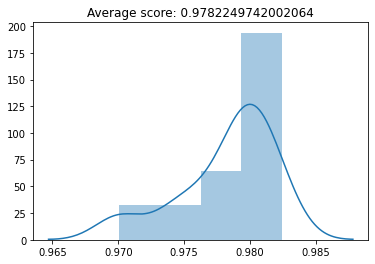

In [364]:
# use seaborn (sns) to plot a graph of the above scores
sns.distplot(cross_validation_scores_randomForest)
plt.title('Average score: {}'.format(np.mean(cross_validation_scores_randomForest)))

In [367]:
#train model with 10 fold validation, 
#cross_val_predict Get predictions from each split of cross-validation for diagnostic purposes.
y_pred_randomForest_crosVal = cross_val_predict(randomForest_crossVal, X_train, y_train, cv=10)

#allows for confusion matrix generation
conf_matrix_randomForest = confusion_matrix(y_train, y_pred_randomForest_crosVal)
classification_report_randomForest = classification_report(y_train, y_pred_randomForest_crosVal)

In [368]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_randomForest)

print("\n")
print(classification_report_randomForest)
#print(roc_auc_score(y, y_pred))

Confusion Matrix
[[ 529    0    0    2    3    0    3    0    3    0]
 [   2  198    1    2    1    2    0    0    4    0]
 [   0    0 1955    0   15    0    0    0   10    0]
 [   2    0    0  253    9    0    1    3    2    0]
 [   0    0   17    0 2177    0    0    3   23    0]
 [   0    0    1    0    0  238    1    0    0    0]
 [   2    0    3    1    6    0  346    2    0    0]
 [   0    0    1    0   13    0    0 1371   25    0]
 [   0    0   10    0   27    0    0    9 2204    0]
 [   0    0    2    0   21    0    0    0    3  184]]


              precision    recall  f1-score   support

       eight       0.99      0.98      0.98       540
        five       1.00      0.94      0.97       210
        four       0.98      0.99      0.98      1980
        nine       0.98      0.94      0.96       270
         one       0.96      0.98      0.97      2220
       seven       0.99      0.99      0.99       240
         six       0.99      0.96      0.97       360
       three     

<hr>
<h4> with Test data <h4> 

Goal : Run a random forest classifier with test data

In [ ]:
#create a Gaussian Classifier - random forest

randomForest_withTestData = RandomForestClassifier(n_estimators = 100)

#train the model using the training set generated 
randomForest_withTestData.fit(X_train, y_train)


#test this model on the seperated data
y_pred_randomForest_testData = randomForest_withTestData.predict(X_test)


#confusion matrix generation
conf_matrix_randomForest_withTestData = confusion_matrix(y_test, y_pred_randomForest_testData)

#accuracy report
classification_report_randomForest_withTestData = classification_report(y_test, y_pred_randomForest_testData)

In [ ]:
print("Confusion Matrix")
print(conf_matrix_randomForest_withTestData)
print("\n")
print(classification_report_randomForest_withTestData)

<hr>
<h4> Data Split - 4000<h4> 

Goal : Run a random forest classifier with 4000 instances moves from the original training data into the test data. 

In [ ]:
#create a Gaussian Classifier - random forest

randomForest_4000Split = RandomForestClassifier(n_estimators = 100)

#train the model using the training set generated 
randomForest_4000Split.fit(X_train_4000Split, y_train_4000Split)


#test this model on the seperated data
y_pred_randomForest_4000Split = randomForest_4000Split.predict(X_test_4000Split)


#confusion matrix generation
conf_matrix_randomForest_4000Split = confusion_matrix(y_test_4000Split, y_pred_randomForest_4000Split)

#accuracy report
classification_report_randomForest_4000Split = classification_report(y_test_4000Split, y_pred_randomForest_4000Split)

In [ ]:
print("Confusion Matrix")
print(conf_matrix_randomForest_4000Split)
print("\n")
print(classification_report_randomForest_4000Split)

<hr>
<h4> Data Split - 9000<h4> 

Goal : Run a random forest classifier with 9000 instances moves from the original training data into the test data. 

In [24]:
#create a Gaussian Classifier - random forest

randomForest_9000Split = RandomForestClassifier(n_estimators = 100)

#train the model using the training set generated 
randomForest_9000Split.fit(X_train_9000Split, y_train_9000Split)


#test this model on the seperated data
y_pred_randomForest_9000Split = randomForest_9000Split.predict(X_test_9000Split)


#confusion matrix generation
conf_matrix_randomForest_9000Split = confusion_matrix(y_test_9000Split, y_pred_randomForest_9000Split)

#accuracy report
classification_report_randomForest_9000Split = classification_report(y_test_9000Split, y_pred_randomForest_9000Split)

In [25]:
print("Confusion Matrix")
print(conf_matrix_randomForest_9000Split)
print("\n")
print(classification_report_randomForest_9000Split)

Confusion Matrix
[[ 240    6   16   21   10    0   13   32   25    0]
 [  26   42   45   15    5    0    0    1    5    0]
 [   3    0 1118    1  173    0    0   66   85    0]
 [  37    0    4  124   11    0    7    6   23    0]
 [   3    0   77    0 1202    0    0   45  321    0]
 [  19    5   23   27   15   37    6    8   25    0]
 [  45    4   16   25    7    0  110   23   11    0]
 [   1    0   96    1   90    0    6  735  136    0]
 [   5    0  103    0  155    0    0  323 1077    0]
 [   0    0   23    0   93    0    0    1   13   18]]


              precision    recall  f1-score   support

       eight       0.63      0.66      0.65       363
        five       0.74      0.30      0.43       139
        four       0.74      0.77      0.75      1446
        nine       0.58      0.58      0.58       212
         one       0.68      0.73      0.71      1648
       seven       1.00      0.22      0.37       165
         six       0.77      0.46      0.57       241
       three     

<h3> Random Forest Parameter Exploration <h3>

<hr>

<h4> binary splits or multiple branching <h4> 

Information on binary splitting with random forests : https://link.springer.com/article/10.1007/s10994-014-5451-2

In [28]:
#create a Gaussian Classifier - random forest

randomForest_TD_PE1 = RandomForestClassifier(n_estimators = 100, min_samples_split = 1 )

#train the model using the training set generated 
randomForest_TD_PE1.fit(X_train, y_train)


#test this model on the seperated data
y_pred_randomForest_TD_PE1 = randomForest_TD_PE1.predict(X_test)


#confusion matrix generation
conf_matrix_randomForest_TD_PE1 = confusion_matrix(y_test, y_pred_randomForest_TD_PE1)

#accuracy report
classification_report_randomForest_TD_PE1 = classification_report(y_test, y_pred_randomForest_TD_PE1)

/Users/Rob/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h4>Pruning <h4>

Pruning Info - https://scikit-learn.org/0.22/auto_examples/tree/plot_cost_complexity_pruning.html

<h4> confidence threshold for pruning <h4>

<h4> minimal number of instances permissible per leaf <h4>

<h2> MLP <h2>

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [377]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

MLPclassifier = MLPClassifier(hidden_layer_sizes=(150,100,50), 
                           max_iter=300,activation = 'relu',solver='adam',random_state=1)

#Fitting the training data to the network
MLPclassifier.fit(X_train, y_train)

#Predicting y for X_val
y_pred_MLP = MLPclassifier.predict(X_test)

#generate classification report
classification_report_MLP= classification_report(y_test, y_pred_MLP)

#set variable as the accuracy of the MLP
accuracy_MLP = MLPclassifier.score(X_test, y_test)

In [385]:
#confusion matrix generation --- currently NOT working
conf_matrix_MLP = confusion_matrix(y_test, y_pred_MLP)

TypeError: 'numpy.ndarray' object is not callable

In [387]:
print(accuracy_MLP)
print(classification_report_MLP)

0.7679611650485437
              precision    recall  f1-score   support

       eight       0.56      0.81      0.66       150
        five       0.78      0.53      0.63        60
        four       0.79      0.86      0.82       660
        nine       0.75      0.49      0.59        90
         one       0.83      0.81      0.82       720
       seven       0.88      0.50      0.64        60
         six       0.77      0.38      0.51        90
       three       0.68      0.88      0.77       450
         two       0.83      0.74      0.78       750
        zero       0.45      0.25      0.32        60

    accuracy                           0.77      3090
   macro avg       0.73      0.62      0.65      3090
weighted avg       0.78      0.77      0.76      3090



<h3> Results and Other <h3>

would be cool to produce some plots like this for comparing models : 


https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

would be good to get this tree visualiser working <br>

https://chrisalbon.com/machine_learning/trees_and_forests/visualize_a_decision_tree/

AttributeError: 'DataFrame' object has no attribute 'concat'